<a href="https://colab.research.google.com/github/Rociosamudio/DataScience-Prediccion-de-precio-de-computadoras/blob/main/KPI_ROD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #DF
import matplotlib.pyplot as plt #graficos
import seaborn as sns #colores


In [11]:
from google.colab import drive
drive.mount('/content/drive')
ruta_archivo : '/content/drive/MyDrive/PROYECTO_INFRA/Enero a agosto.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df_infra = pd.read_excel('/content/drive/MyDrive/PROYECTO_INFRA/Enero a agosto.xlsx')

In [15]:
print(df_infra.head())

  Tipo evento      Id Aeropuerto                    1er Nivel  \
0   Operativo  255838        EZE  Recursos AA2000 Lado Tierra   
1   Operativo  255836        EZE  Recursos AA2000 Lado Tierra   
2   Operativo  255833        EZE    Recursos AA2000 Lado Aire   
3   Operativo  255831        EZE  Recursos AA2000 Lado Tierra   
4   Operativo  255830        EZE  Recursos AA2000 Lado Tierra   

                       2do Nivel                          3er Nivel  \
0                     Ascensores             Ascensores de personas   
1                          Baños                Mingitorio - Tapado   
2  Posiciones de estacionamiento  Posición con pasarela telescópica   
3                          Baños                Mingitorio - Tapado   
4                          Baños                           Rejillas   

   Descripción  Acción Correctiva Prog.       Fec. Inicio  ... EquipoTercero  \
0          NaN                NaN    NO  28/08/2025 23:46  ...             0   
1          NaN        

#Eventos atendido por mantenimiento

In [19]:
total_eventos = df_infra['Id'].count() #Total de eventos

#Eventos atendidos por las 4 áreas de mantenimiento
eventos_mantenimiento = df_infra[df_infra['Responsable'].isin([
    'EZE Mantenimiento Infra',
    'EZE Mantenimiento Electricidad',
    'EZE Mantenimiento Termo',
    'EZE Mantenimiento Electrónica'
])].shape[0]

# Calcular el porcentaje total
porcentaje_mantenimiento = (eventos_mantenimiento / total_eventos) * 100
print(f"% eventos atendido por mantenimiento: {porcentaje_mantenimiento:.2f}%")

% eventos atendido por mantenimiento: 77.38%


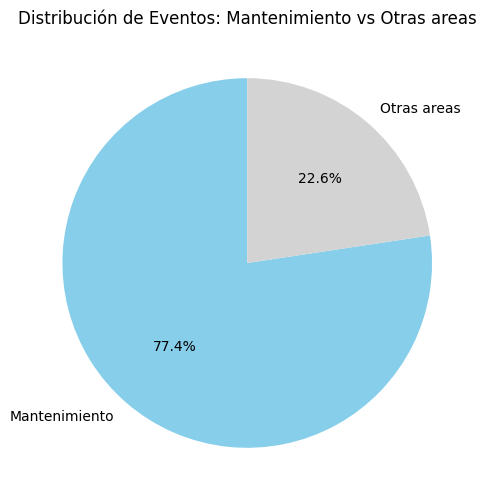

In [22]:
data_grafico = {
    'Categoría': ['Mantenimiento', 'Otras areas'],
    'Cantidad': [eventos_mantenimiento, total_eventos - eventos_mantenimiento]
}

# Convertir el diccionario a un DataFrame de pandas
df_grafico = pd.DataFrame(data_grafico)

# Crear el gráfico de torta usando la librería matplotlib
plt.figure(figsize=(8, 6))
plt.pie(df_grafico['Cantidad'], labels=df_grafico['Categoría'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgrey'])
plt.title('Distribución de Eventos: Mantenimiento vs Otras areas')
plt.show()

In [27]:
total_eventos = df_infra['Id'].count()# total de eventos en el DataFrame


conteo_areas = df_infra[df_infra['Responsable'].isin([
    'EZE Mantenimiento Infra',
    'EZE Mantenimiento Electricidad',
    'EZE Mantenimiento Termo',
    'EZE Mantenimiento Electrónica'
])]['Responsable'].value_counts()
# Contar los eventos de mantenimiento

#porcentaje de cada área
porcentaje_areas = (conteo_areas / total_eventos) * 100

print("Conteo de eventos por área de mantenimiento:")
print(conteo_areas)
print("\nPercentaje de eventos sobre el total:")
print(porcentaje_areas)


Conteo de eventos por área de mantenimiento:
Responsable
EZE Mantenimiento Infra           6593
EZE Mantenimiento Termo           2053
EZE Mantenimiento Electricidad     879
EZE Mantenimiento Electrónica      221
Name: count, dtype: int64

Percentaje de eventos sobre el total:
Responsable
EZE Mantenimiento Infra           52.346169
EZE Mantenimiento Termo           16.300119
EZE Mantenimiento Electricidad     6.978960
EZE Mantenimiento Electrónica      1.754665
Name: count, dtype: float64


#HS promedio

In [25]:
df_infra['Fec. Inicio'] = pd.to_datetime(df_infra['Fec. Inicio'], dayfirst=True, errors='coerce') # Convertir las columnas de fecha a formato datetime
df_infra['Fec. Fin'] = pd.to_datetime(df_infra['Fec. Fin'], dayfirst=True, errors='coerce')

/tmp/ipython-input-1841663223.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_infra['Fec. Fin'] = pd.to_datetime(df_infra['Fec. Fin'], dayfirst=True, errors='coerce')


In [28]:
eventos_cerrados = df_infra[ # Filtrar los eventos 'cerrados'
    df_infra['Responsable'].isin([
        'EZE Mantenimiento Infra',
        'EZE Mantenimiento Electricidad',
        'EZE Mantenimiento Termo',
        'EZE Mantenimiento Electrónica'
    ]) & df_infra['Fec. Fin'].notna()
].copy() #.copy() por el SettingWithCopyWarning


eventos_cerrados['Duracion Horas'] = (
    (eventos_cerrados['Fec. Fin'] - eventos_cerrados['Fec. Inicio']).dt.total_seconds() / 3600 # duración de cada evento en horas
)


promedio_duracion = eventos_cerrados['Duracion Horas'].mean() #Calcular el promedio de la duración

#resultado final
print(f"El promedio de horas de cierre de eventos de Mantenimiento es: {promedio_duracion:.2f} horas.")

El promedio de horas de cierre de eventos de Mantenimiento es: 39.91 horas.


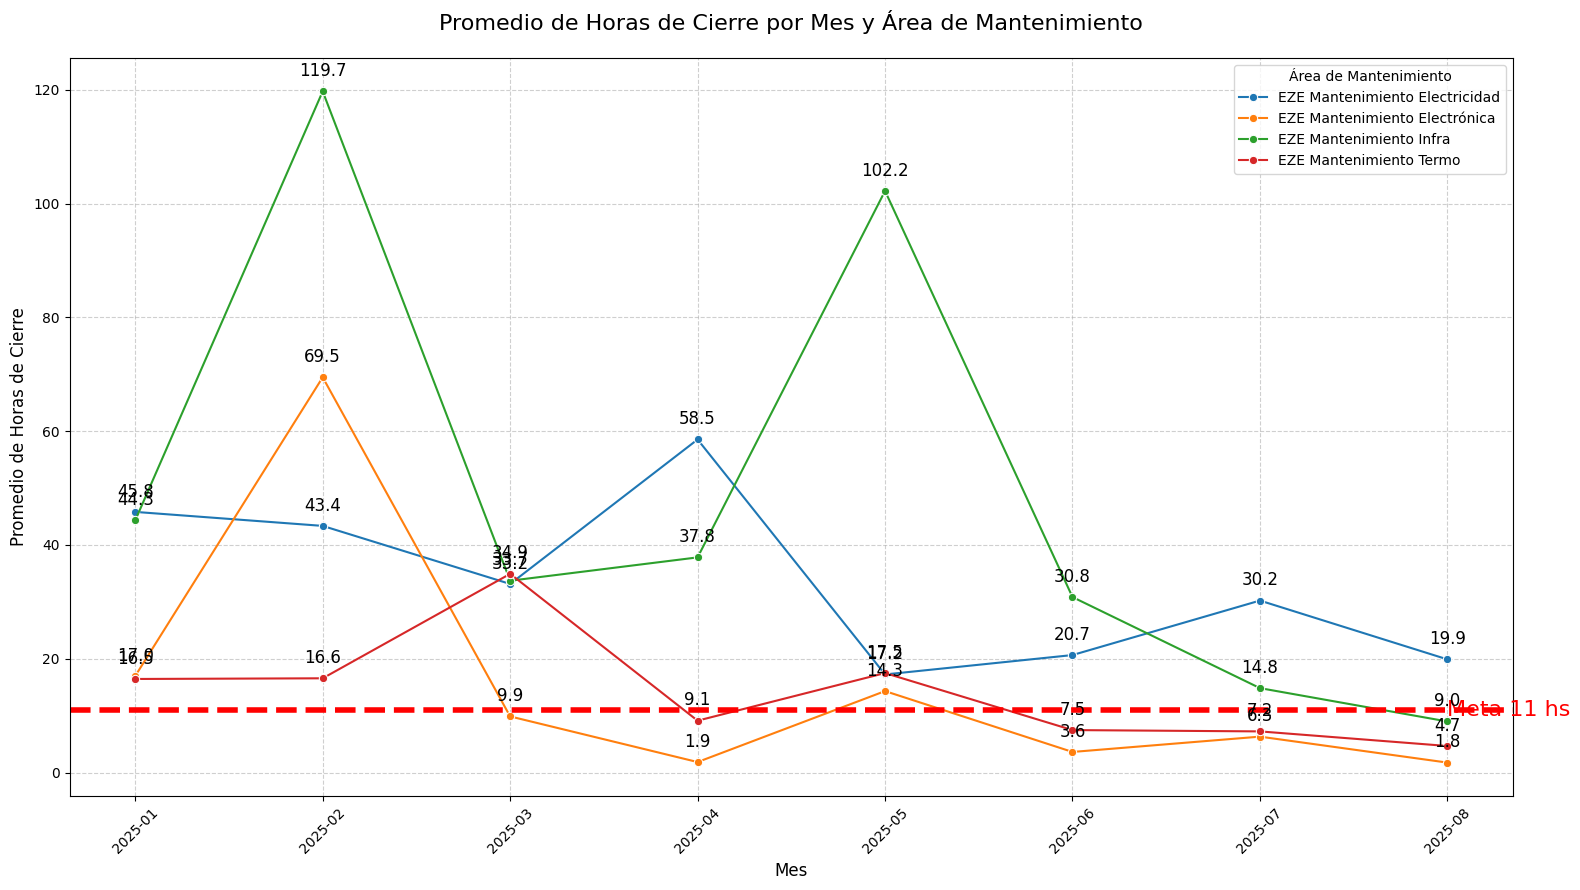

In [32]:
# 1. Preparación de los datos
df_mantenimiento = df_infra[
    df_infra['Responsable'].isin([
        'EZE Mantenimiento Infra',
        'EZE Mantenimiento Electricidad',
        'EZE Mantenimiento Termo',
        'EZE Mantenimiento Electrónica'
    ]) & df_infra['Fec. Fin'].notna()
].copy()

df_mantenimiento['Duracion Horas'] = (df_mantenimiento['Fec. Fin'] - df_mantenimiento['Fec. Inicio']).dt.total_seconds() / 3600
df_mantenimiento['Mes'] = df_mantenimiento['Fec. Inicio'].dt.to_period('M')
promedio_por_mes = df_mantenimiento.groupby(['Mes', 'Responsable'])['Duracion Horas'].mean().reset_index()
promedio_por_mes['Mes_str'] = promedio_por_mes['Mes'].astype(str)

# 2. Creación del gráfico
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=promedio_por_mes,
    x='Mes_str',
    y='Duracion Horas',
    hue='Responsable',
    marker='o'
)

# Agregar la línea de la meta de 11 horas y su etiqueta
plt.axhline(y=11, color='red', linestyle='--', linewidth=4)
plt.text(promedio_por_mes['Mes_str'].iloc[-1], 11, 'Meta 11 hs', color='red', ha='left', va='center', fontsize=16)

# 3. Agregar las etiquetas de datos de forma inteligente
etiquetas_ya_usadas = {}
for i, row in promedio_por_mes.iterrows():
    # Coordenadas del punto
    x = row['Mes_str']
    y = row['Duracion Horas']
    texto = f"{y:.1f}"

    # Lógica para evitar superposiciones
    desplazamiento_y = 0
    while (x, y + desplazamiento_y) in etiquetas_ya_usadas:
        desplazamiento_y += 5 # Desplaza la etiqueta 5 unidades hacia arriba

    etiquetas_ya_usadas[(x, y + desplazamiento_y)] = True

    # Agrega la etiqueta con desplazamiento
    plt.text(x, y + desplazamiento_y + 2, texto, ha='center', va='bottom', fontsize=12)

# Configuración del gráfico
plt.title('Promedio de Horas de Cierre por Mes y Área de Mantenimiento', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Horas de Cierre', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Área de Mantenimiento', loc='upper right')
plt.tight_layout()
plt.show()


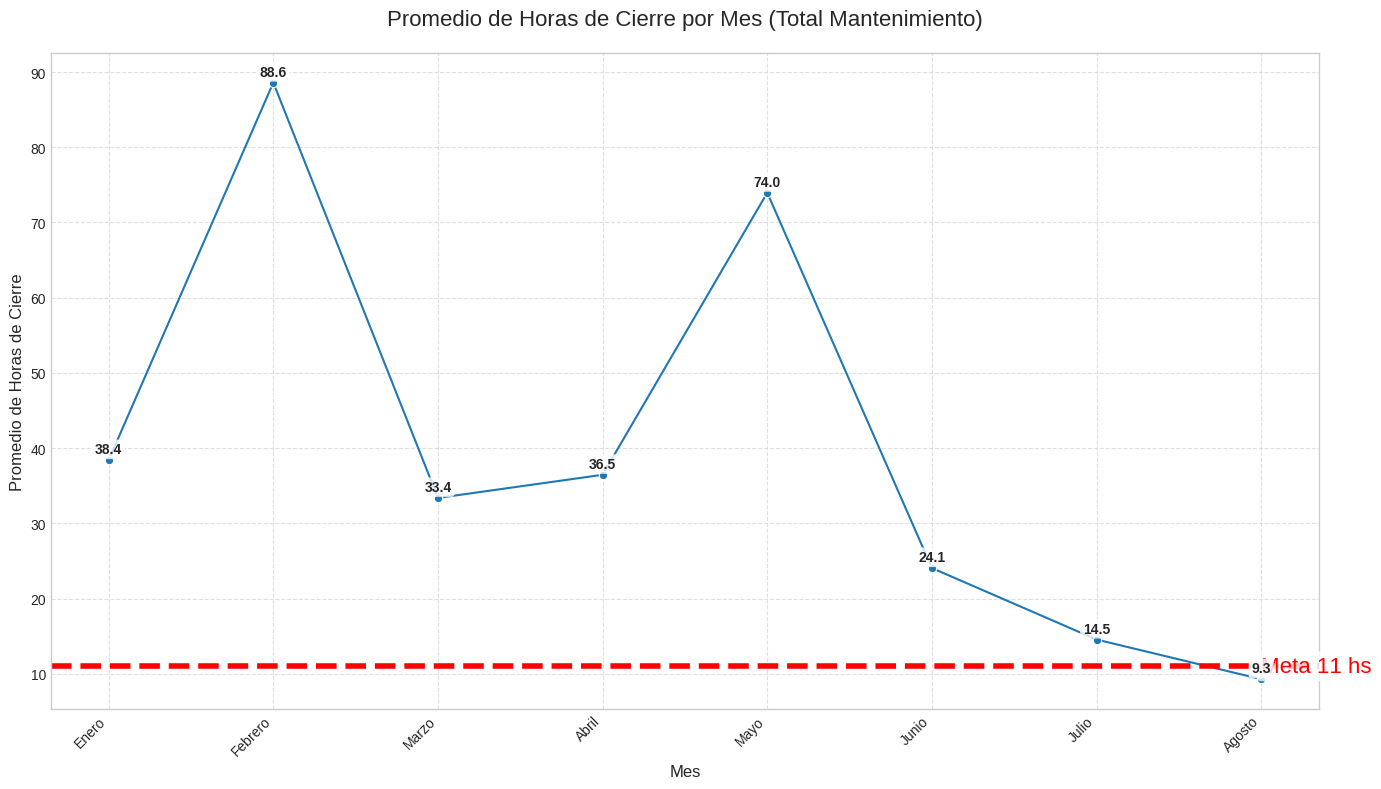

In [37]:
# Calcular la duración de cada evento en horas
df_mantenimiento['Duracion Horas'] = (df_mantenimiento['Fec. Fin'] - df_mantenimiento['Fec. Inicio']).dt.total_seconds() / 3600

# Extraer el mes y agrupar para el gráfico
df_mantenimiento['Mes_Numero'] = df_mantenimiento['Fec. Inicio'].dt.month
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Fec. Inicio'].dt.strftime('%B')

# Mapear a nombres de meses en español
mapeo_meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre',
    'December': 'Diciembre'
}
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Mes_Nombre'].map(mapeo_meses)

# Agrupar los datos para obtener el promedio de horas por mes (total de las 4 áreas)
promedio_por_mes = df_mantenimiento.groupby(['Mes_Numero', 'Mes_Nombre'])['Duracion Horas'].mean().reset_index()

# 2. Creación del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=promedio_por_mes,
    x='Mes_Numero',
    y='Duracion Horas',
    marker='o'
)

# 3. Ajustes de visualización
plt.axhline(y=11, color='red', linestyle='--', linewidth=4)
plt.text(
    promedio_por_mes['Mes_Numero'].max(), 11,
    'Meta 11 hs',
    color='red',
    ha='left',
    va='center',
    fontsize=16,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
)

# Mapear los números de mes a nombres en el eje x
meses_unicos = promedio_por_mes.sort_values('Mes_Numero')['Mes_Nombre'].unique()
plt.xticks(
    ticks=promedio_por_mes['Mes_Numero'].unique(),
    labels=meses_unicos,
    rotation=45,
    ha='right'
)

# Agregar las etiquetas de datos a cada punto
for i, row in promedio_por_mes.iterrows():
    plt.text(
        row['Mes_Numero'],
        row['Duracion Horas'] + 0.5,
        f"{row['Duracion Horas']:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Configuración final del gráfico
plt.title('Promedio de Horas de Cierre por Mes (Total Mantenimiento)', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Horas de Cierre', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#KPI cumplimineto

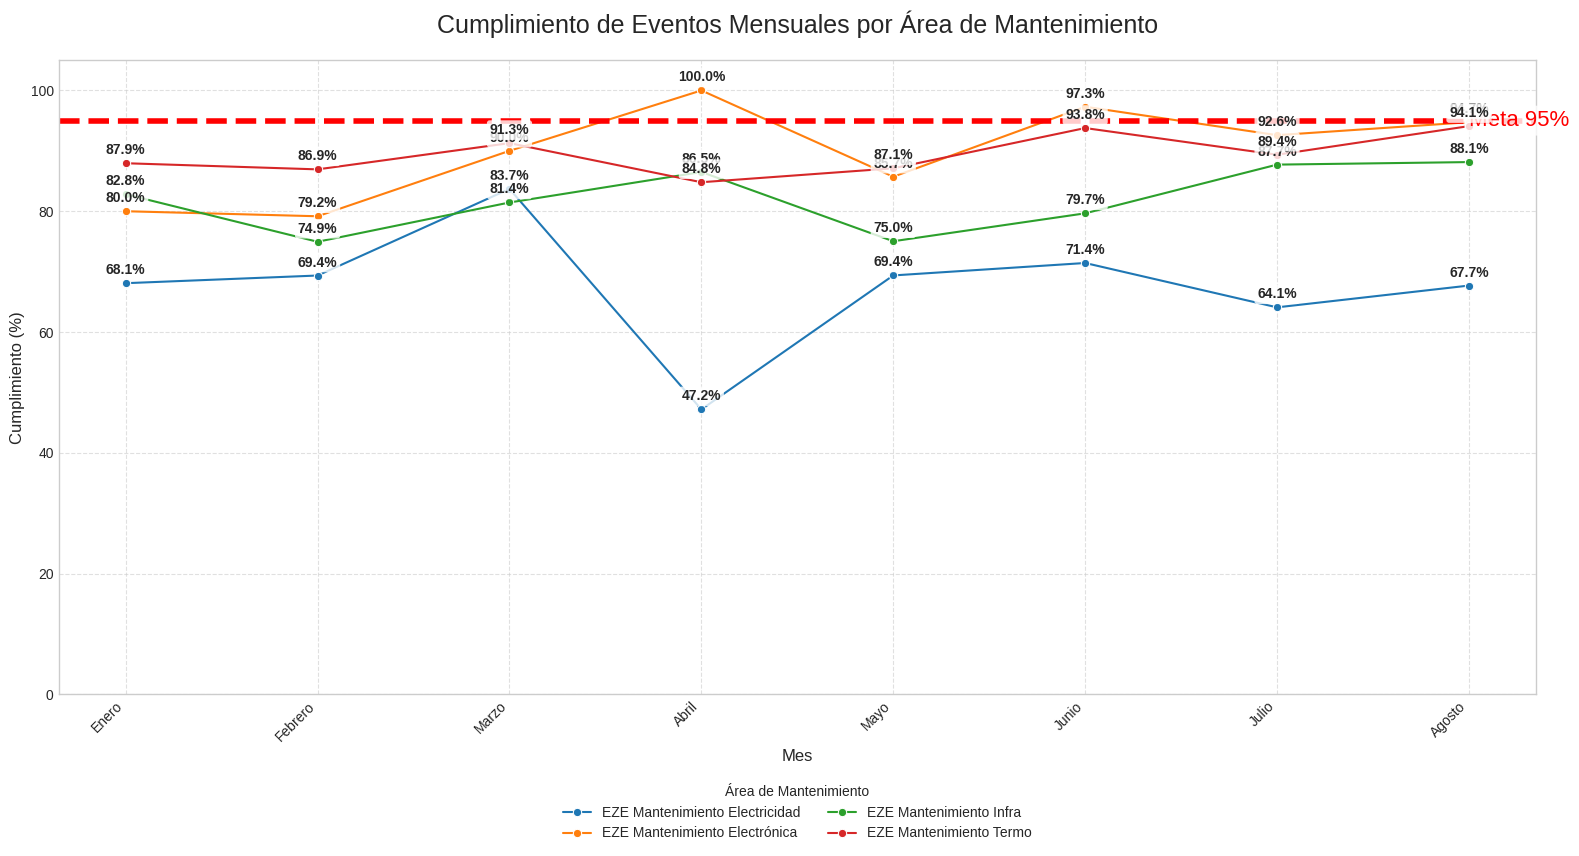

In [35]:
# 1. Preparación de los datos
df_mantenimiento = df_infra[
    df_infra['Responsable'].isin([
        'EZE Mantenimiento Infra',
        'EZE Mantenimiento Electricidad',
        'EZE Mantenimiento Termo',
        'EZE Mantenimiento Electrónica'
    ]) & df_infra['Fec. Fin'].notna()
].copy()

df_mantenimiento['Duracion Horas'] = (df_mantenimiento['Fec. Fin'] - df_mantenimiento['Fec. Inicio']).dt.total_seconds() / 3600

# Definir el KPI: el evento cumple si la duración es <= 11 horas
df_mantenimiento['Cumplimiento'] = (df_mantenimiento['Duracion Horas'] <= 11)

# Extraer el mes y el año y agrupar para el gráfico
df_mantenimiento['Mes_Numero'] = df_mantenimiento['Fec. Inicio'].dt.month
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Fec. Inicio'].dt.strftime('%B')

# Mapear a nombres de meses en español
mapeo_meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre',
    'December': 'Diciembre'
}
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Mes_Nombre'].map(mapeo_meses)

kpi_por_mes = df_mantenimiento.groupby(['Mes_Numero', 'Mes_Nombre', 'Responsable'])['Cumplimiento'].mean().reset_index()

# Convertir la proporción a porcentaje
kpi_por_mes['Cumplimiento %'] = kpi_por_mes['Cumplimiento'] * 100

# 2. Creación del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=kpi_por_mes,
    x='Mes_Numero',
    y='Cumplimiento %',
    hue='Responsable',
    marker='o',
    dashes=False
)

# 3. Ajustes de visualización
plt.legend(title='Área de Mantenimiento', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, fontsize='medium')

# Mapear los números de mes a nombres en el eje x
meses_unicos = kpi_por_mes.sort_values('Mes_Numero')['Mes_Nombre'].unique()
plt.xticks(
    ticks=kpi_por_mes['Mes_Numero'].unique(),
    labels=meses_unicos,
    rotation=45,
    ha='right'
)

# Agregar la línea de meta y su etiqueta
plt.axhline(y=95, color='red', linestyle='--', linewidth=4)
plt.text(
    kpi_por_mes['Mes_Numero'].iloc[-1], 95,
    'Meta 95%',
    color='red',
    ha='left',
    va='center',
    fontsize=16,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
)

# Agregar las etiquetas de datos y evitar superposiciones
for i, row in kpi_por_mes.iterrows():
    plt.text(
        row['Mes_Numero'],
        row['Cumplimiento %'] + 1,
        f"{row['Cumplimiento %']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Configuración final del gráfico
plt.title('Cumplimiento de Eventos Mensuales por Área de Mantenimiento', fontsize=18, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cumplimiento (%)', fontsize=12)
plt.ylim(0, 105)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

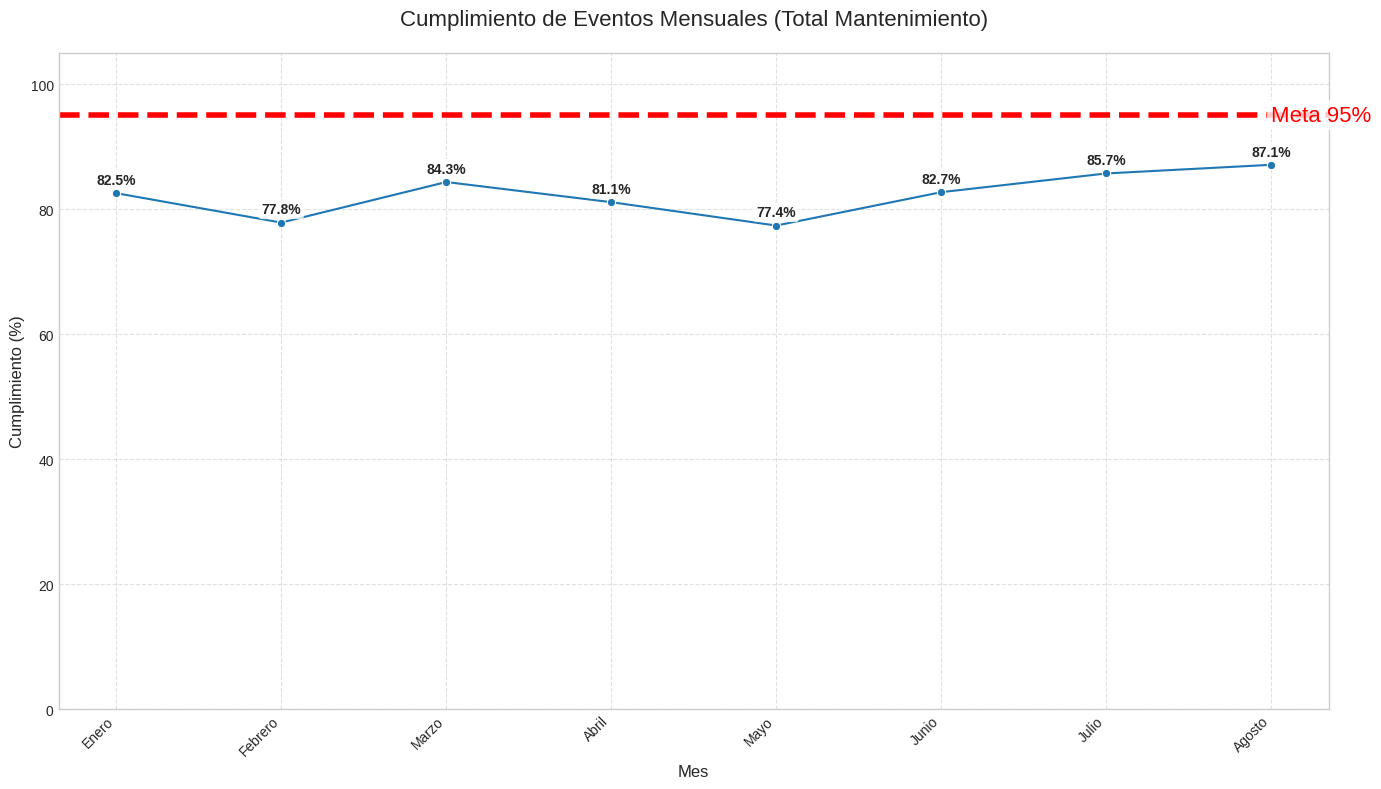

In [38]:
# Definir el KPI: el evento cumple si la duración es <= 11 horas
df_mantenimiento['Cumplimiento'] = (df_mantenimiento['Duracion Horas'] <= 11)

# Extraer el mes y agrupar para el gráfico
df_mantenimiento['Mes_Numero'] = df_mantenimiento['Fec. Inicio'].dt.month
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Fec. Inicio'].dt.strftime('%B')

# Mapear a nombres de meses en español
mapeo_meses = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre',
    'December': 'Diciembre'
}
df_mantenimiento['Mes_Nombre'] = df_mantenimiento['Mes_Nombre'].map(mapeo_meses)

# Agrupar los datos para obtener el porcentaje de cumplimiento por mes
# (TOTAL de las 4 áreas)
kpi_total_por_mes = df_mantenimiento.groupby(['Mes_Numero', 'Mes_Nombre'])['Cumplimiento'].mean().reset_index()

# Convertir la proporción a porcentaje
kpi_total_por_mes['Cumplimiento %'] = kpi_total_por_mes['Cumplimiento'] * 100

# 2. Creación del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=kpi_total_por_mes,
    x='Mes_Numero',
    y='Cumplimiento %',
    marker='o'
)

# 3. Ajustes de visualización

# Agregar la línea de la meta del 95%
plt.axhline(y=95, color='red', linestyle='--', linewidth=4)
plt.text(
    kpi_total_por_mes['Mes_Numero'].max(), 95,
    'Meta 95%',
    color='red',
    ha='left',
    va='center',
    fontsize=16,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
)

# Mapear los números de mes a nombres en el eje x
meses_unicos = kpi_total_por_mes.sort_values('Mes_Numero')['Mes_Nombre'].unique()
plt.xticks(
    ticks=kpi_total_por_mes['Mes_Numero'].unique(),
    labels=meses_unicos,
    rotation=45,
    ha='right'
)

# Agregar las etiquetas de datos a cada punto
for i, row in kpi_total_por_mes.iterrows():
    plt.text(
        row['Mes_Numero'],
        row['Cumplimiento %'] + 1,
        f"{row['Cumplimiento %']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
    )

# Configuración final del gráfico
plt.title('Cumplimiento de Eventos Mensuales (Total Mantenimiento)', fontsize=16, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cumplimiento (%)', fontsize=12)
plt.ylim(0, 105)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
